In [17]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
''' 
Script - Do Not Modify
'''

# Import Images
orange = Image.open('orange.png')
apple = Image.open('apple.png')

# Input Image as Numpy Arrays
orange = np.array(orange)
apple = np.array(apple)

In [3]:
'''
Function - Do Not Modify

This function is provided to you to use in your solution. You should not modify 
this function. 
'''

def get_gaussian_kernel(size, sigma):
  """
  This function returns a gaussian kernel given size and sigma

  size - number of rows/ no. of cols 
  sigma - standard deviation of the gaussian kernel required
  returns size * size 
  """
  # DO NOT MODIFY
  kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma**2)), (size, size))
  kernel /= np.sum(kernel)
  
  return kernel

In [4]:
'''
Function - Modify

Fill in the expand function
'''

def expand(input_image):
    """
    This function returns The image after the expand operation

    Input: 
    input_image: (m x n x 1)/(m x n x 3)  - The input image (numpy array)

    Output-
    output - (2m x 2n x 1)/(2m x 2n x 3)  - The output image (numpy array)

    Some Important Notes:
    - Keep in mind the 3rd dimension of image can either be 1 or 3 so avoid 
        hard coding values. It is a good practice to take most of the data from 
        the inputs (eg. input_image.shape[2])
    - You can use the helper function 'get_gaussian_kernel' provided above in 
        your program
    """

    # 1) Create the expanded image. 
    #    The new image should be twice the size of the original image.
    #    So, for an n x n image you will create an empty 2n x 2n image
    #    Fill every second row and column with the rows and columns of the original
    #    image
    #    i.e., 1st row of I -> 1st row of expanded image
    #          2nd row of I -> 3rd row of expanded image
    #          3rd row of I -> 5th row of expanded image, and so on
    expanded_image = np.zeros((2 * input_image.shape[0], 2 * input_image.shape[1], input_image.shape[2]))
    expanded_image[::2, ::2] = input_image
    
    

    # 2) Create a Gaussian kernel of size 5x5 and standard deviation equal to 1 
    kernel = get_gaussian_kernel(5, 1)

    # IMPLEMENT THIS FUNCTION HERE

    # 3) Convolve the input image with the filter kernel 
    #    Remember to multiply the output of the filtering with a factor of 4
    
    output_image = 4*signal.convolve(expanded_image, kernel[:, :, None], mode='same')

    return output_image

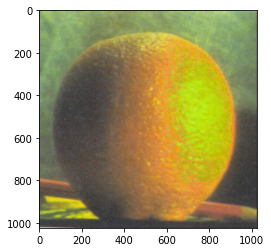

In [5]:
## Test ##
orange_image = expand(orange)
plt.imshow(orange_image.astype(np.uint8))
orange_pil_image = Image.fromarray(orange_image.astype(np.uint8))
orange_pil_image.save('orange_expanded.png')
expand_correct_output = np.load('expand_output.npy')
assert np.allclose(expand_correct_output, orange_image)

In [6]:
'''
Function - Modify

Fill in the reduce function
'''
def reduce(input_image):
    """
  This funcion returns the image after gaussian blurring and subsampling 
  Input- 
    input_image: (m x n x 1)/(m x n x 3)  - The input image (numpy array)

  Output-
    output - (m/2 x n/2 x 1)/(m/2 x n/2 x 3)  - The output image (numpy array)

  Some Important Notes:
   - Keep in mind the 3rd dimension of image can either be 1 or 3 so avoid 
     hard coding values. It is a good practice to take most of the data from 
     the inputs (eg. input_image.shape[2])
   - You can use the helper functions 'get_gaussian_kernel' provided above in 
     your program
  """
  # 1) Create a Gaussian kernel of size 5x5 and 
  #   standard deviation equal to 1 
    kernel = get_gaussian_kernel(5, 1)

  
  # IMPLEMENT THIS FUNCTION HERE

  # 2) Convolve the input image with the filter kernel
  #    Tip: Use the default settings of imfilter
#     blurred_image = signal.convolve2d(input_image, kernel)
    blurred_image = signal.convolve(input_image, kernel[:, :, None], mode='same')
  
  # IMPLEMENT THIS FUNCTION HERE

  # 3) Subsample the image by a factor of 2
  #   i.e., keep only 1st, 3rd, 5th, .. rows and columns

  # IMPLEMENT THIS FUNCTION HERE

    output_image = blurred_image[::2,::2]
#     print(blurred_image.shape, output_image.shape)
    return output_image
    
#   ...
#       return output

In [7]:
## Test ##
apple_image = reduce(apple)
reduce_correct_output1 = np.load('reduce_output1.npy')
assert np.allclose(reduce_correct_output1, apple_image)

In [8]:
'''
Function - Modify

Fill in the gaussian_pyramid function to return the appropriate output
'''

def gaussian_pyramid(input_image, depth):
    """
  This function returns the gaussian pyramid of the input image according to 
  the number of depth levels
  
  Input:
  input_image: (m x n x 3)/(m x n x 1) the input image
  depth: number of levels of the Gaussian pyramid
  
  Output: 
  A numpy object array containing all the levels of the Gaussian pyramid 
  Please follow the instructions to fill in the missing commands. 
  """
    
    gaussian_pyramid = np.empty((depth), dtype=object)
    
    gaussian_pyramid[0] = input_image
    for i in range(1, depth):
        gaussian_pyramid[i] = reduce(gaussian_pyramid[i-1])

    return gaussian_pyramid

In [9]:
## Test ##
orange = Image.open('orange.png')
orange = np.array(orange)

# Depth Levels of the Gaussian Pyramids
depth = 5

gP = gaussian_pyramid(orange, depth)
gaussian_pyramid_output = np.load('gaussian_pyramid_layer.npy')
assert np.allclose(gaussian_pyramid_output, gP[4])

In [10]:
'''
Function - Modify

Fill in the laplacian_pyramid function to return the appropriate output
'''

def laplacian_pyramid(input_image, depth):
    """
    This function returns the laplacian pyramid of the input image according to 
    the number of depth levels  

    Input:
    input_image: (m x n x 1)/(m x n x 3) the input image
    depth: number of levels of the Laplacian pyramid
    Output:
    L: a numpy object array containing all the levels of the Laplacian pyramid
    """

    # Please follow the instructions to fill in the missing commands.

    lp = np.empty((depth), dtype=object)

    # 1) Create a Gaussian pyramid
    # Use the function you already created.
    gp = gaussian_pyramid(input_image, depth)

    # 2) Create a pyramid, where each level is the corresponding level of
    # the Gaussian pyramid minus the expanded version of the next level of
    # the Gaussian pyramid.
    # Remember that the last level of the Laplacian pyramid is the same as
    # the last level of the Gaussian pyramid.

    # IMPLEMENT THIS FUNCTION HERE
    
    
    for i in range(0, depth - 1):
        lp[i] = gp[i] - expand(gp[i+1])
    lp[depth - 1] = gp[depth - 1]

    return lp
    

In [11]:
## Test ##
orange = Image.open('orange.png')
orange = np.array(orange)

# Depth Levels of the Gaussian Pyramids
depth = 5

lP = laplacian_pyramid(orange, depth)
laplacian_pyramid_output0 = np.load('laplacian_pyramid_layer0.npy')
assert np.allclose(laplacian_pyramid_output0, lP[0])
laplacian_pyramid_output4 = np.load('laplacian_pyramid_layer4.npy')
assert np.allclose(laplacian_pyramid_output4, lP[4])

In [12]:
'''
Function - Modify

Fill in the combine function to return the appropriate output
'''

def combine(LA, LB, GR):
  
    """
    This function returns the combined Laplacian Pyramid of two input images
    over the Gaussian Pyramid over the selected region

    Input:
    LA: the Laplacian pyramid of the first image
    LB: the Laplacian pyramid of the second image
    GR: Gaussian pyramid of the selected region
    Output:
    LS: Combined Laplacian pyramid
    """

    # Please follow the instructions to fill in the missing commands.
  
    depth = LA.shape[0]
    # IMPLEMENT THIS FUNCTION HERE

    # 1) Combine the Laplacian pyramids of the two images.
    #    For every level d, and every pixel (i,j) the output for the 
    #    combined Laplacian pyramid is of the form:
    LS = np.empty((depth), dtype=object)
    for d in range(depth):
        LS[d] = GR[d] * LA[d] + (1 - GR[d]) * LB[d]
#         LS(d,i,j) = GR(d,i,j)*LA(d,i,j) + (1-GR(d,i,j))*LB(d,i,j)

    return LS

In [13]:
## Test ##
# Input Images
orange = Image.open('orange.png')
orange = np.array(orange)
apple = Image.open('apple.png')
apple = np.array(apple)

black_and_white = np.zeros((512,512, 1), dtype=float)
black_and_white[:,257:512, :]=1

# depth of the pyramids
depth = 5

# 1) we build the Laplacian pyramids of the two images
Lorange = laplacian_pyramid(orange,depth)
Lapple = laplacian_pyramid(apple,depth)

# 2) we build the Gaussian pyramid of the selected region
Gblack_and_white = gaussian_pyramid(black_and_white,depth)
  
  
# 3) we combine the two pyramids using the nodes of GR as weights  
LS = combine(Lorange, Lapple, Gblack_and_white)

combine_output = np.load('combine_output.npy')
assert np.allclose(combine_output, LS[4])

In [14]:
def collapse(laplacian_pyramid):
    """
    This function collapses the input laplacian pyramid and returns the
    recovered image

    Input:
    laplacian_pyramid: the Laplacian pyramid of an image
    Output:
    I: The Recovered image from the Laplacian pyramid
    """


    # Please follow the instructions to fill in the missing commands.
    #
    # 1) Recover the image that is encoded in the Laplacian pyramid
    depth = laplacian_pyramid.shape[0]
    expanded_image = expand(laplacian_pyramid[depth - 1])
    
    for i in range(depth - 2, 0, -1):
#         print(i)
        expanded_image += laplacian_pyramid[i]
        expanded_image = expand(expanded_image)
        
    expanded_image += laplacian_pyramid[0]
        
    return expanded_image

In [15]:
## Test ##
# Input Images
orange = Image.open('orange.png')
orange = np.array(orange)
apple = Image.open('apple.png')
apple = np.array(apple)

# Used to define the way we are merging the two images
black_and_white = np.zeros((512,512, 1), dtype=float)
black_and_white[:,257:512, :]=1

# depth of the pyramids
depth = 5

# 1) we build the Laplacian pyramids of the two images
Lorange = laplacian_pyramid(orange,depth)
Lapple = laplacian_pyramid(apple,depth)

# 2) we build the Gaussian pyramid of the selected region
Gblack_and_white = gaussian_pyramid(black_and_white,depth)
  
  
# 3) we combine the two pyramids using the nodes of GR as weights  
LS = combine(Lorange, Lapple, Gblack_and_white)

# 4) we collapse the output pyramid to get the final blended image
blended_image = collapse(LS).astype(np.uint8)

blended_image_output = np.load('blended_image_output.npy')
assert np.allclose(blended_image_output, blended_image, atol=1)

In [20]:
# plt.imshow(blended_image_output.astype(np.uint8))

In [21]:
# pil_image = Image.fromarray(blended_image_output.astype(np.uint8) * 255).convert('L')
# pil_image.save(os.path.join("result.png"))